In [5]:
from fractal_dataset import FractalImageDataset

eval_dataset = FractalImageDataset(
    num_classes=1,
    num_samples_per_class=1000,
    image_size=256,
    max_iter=30,
    R=2,
    device="cuda",
    train=True,
    seed=0,
)





$$
\text{Fractal is parameterized by } \text{poly0}, \text{poly1}, \text{poly2}, \text{poly3} \sim U(-1, 1) \\
$$

$$
\begin{align*}
z_0 &= 0, \alpha \sim U(0, 2\pi), \beta \sim U(0, 2\pi), p \sim U(0, 5) \\
z_{n+1} &= \left( f(z_n) \cdot e^{i \alpha} \right)^p + c \cdot e^{i \beta} \\
f(z_n) &= P\left( \Re(z_n) \right) + i \Im(z_n) \\
P(x) &= \text{poly0} + \text{poly1} \cdot x^2 + \text{poly2} \cdot x^3 + \text{poly3} \cdot x^4 \\[10pt]
\end{align*}
$$

$$
\text{and the iteration continues until} \quad |z_n|^2 \geq R^2.
$$

In [6]:
from PIL import Image
import torch
images, labels = eval_dataset.get_batch(10)
images = images * 255
images = images.to(torch.uint8)


image_dict = {idx: [] for idx in range(20)}

for i in range(images.shape[0]):
    image = images[i]
    label = labels[i].item()
    image = image.permute(1, 2, 0)
    image = image.cpu().numpy()
    image = Image.fromarray(image)
    image_dict[label].append(image)


In [7]:
# visualize the images in large grid
from PIL import Image, ImageDraw, ImageFont

def visualize_images(image_dict):
    num_classes = len(image_dict)
    num_images = len(image_dict[0])
    grid_size = (num_classes, num_images)
    offset = 512
    grid_image = Image.new("RGB", (num_images * 256 + offset, (num_classes) * 256), (255, 255, 255))

    for idx, images in image_dict.items():
        for i, image in enumerate(images):
            image.thumbnail((256, 256))
            grid_image.paste(image, (offset + i * 256, idx * 256))
            
    # add label to the top of the grid
    draw = ImageDraw.Draw(grid_image)
    # make font size bigger
    fnt = ImageFont.truetype("/usr/share/fonts/truetype/noto/NotoSansMono-Regular.ttf", 90)


    for idx, images in image_dict.items():
        draw.text((20, idx * 256 + 60), f"Class {idx}", fill=(0, 0, 0), font=fnt)
        

    return grid_image

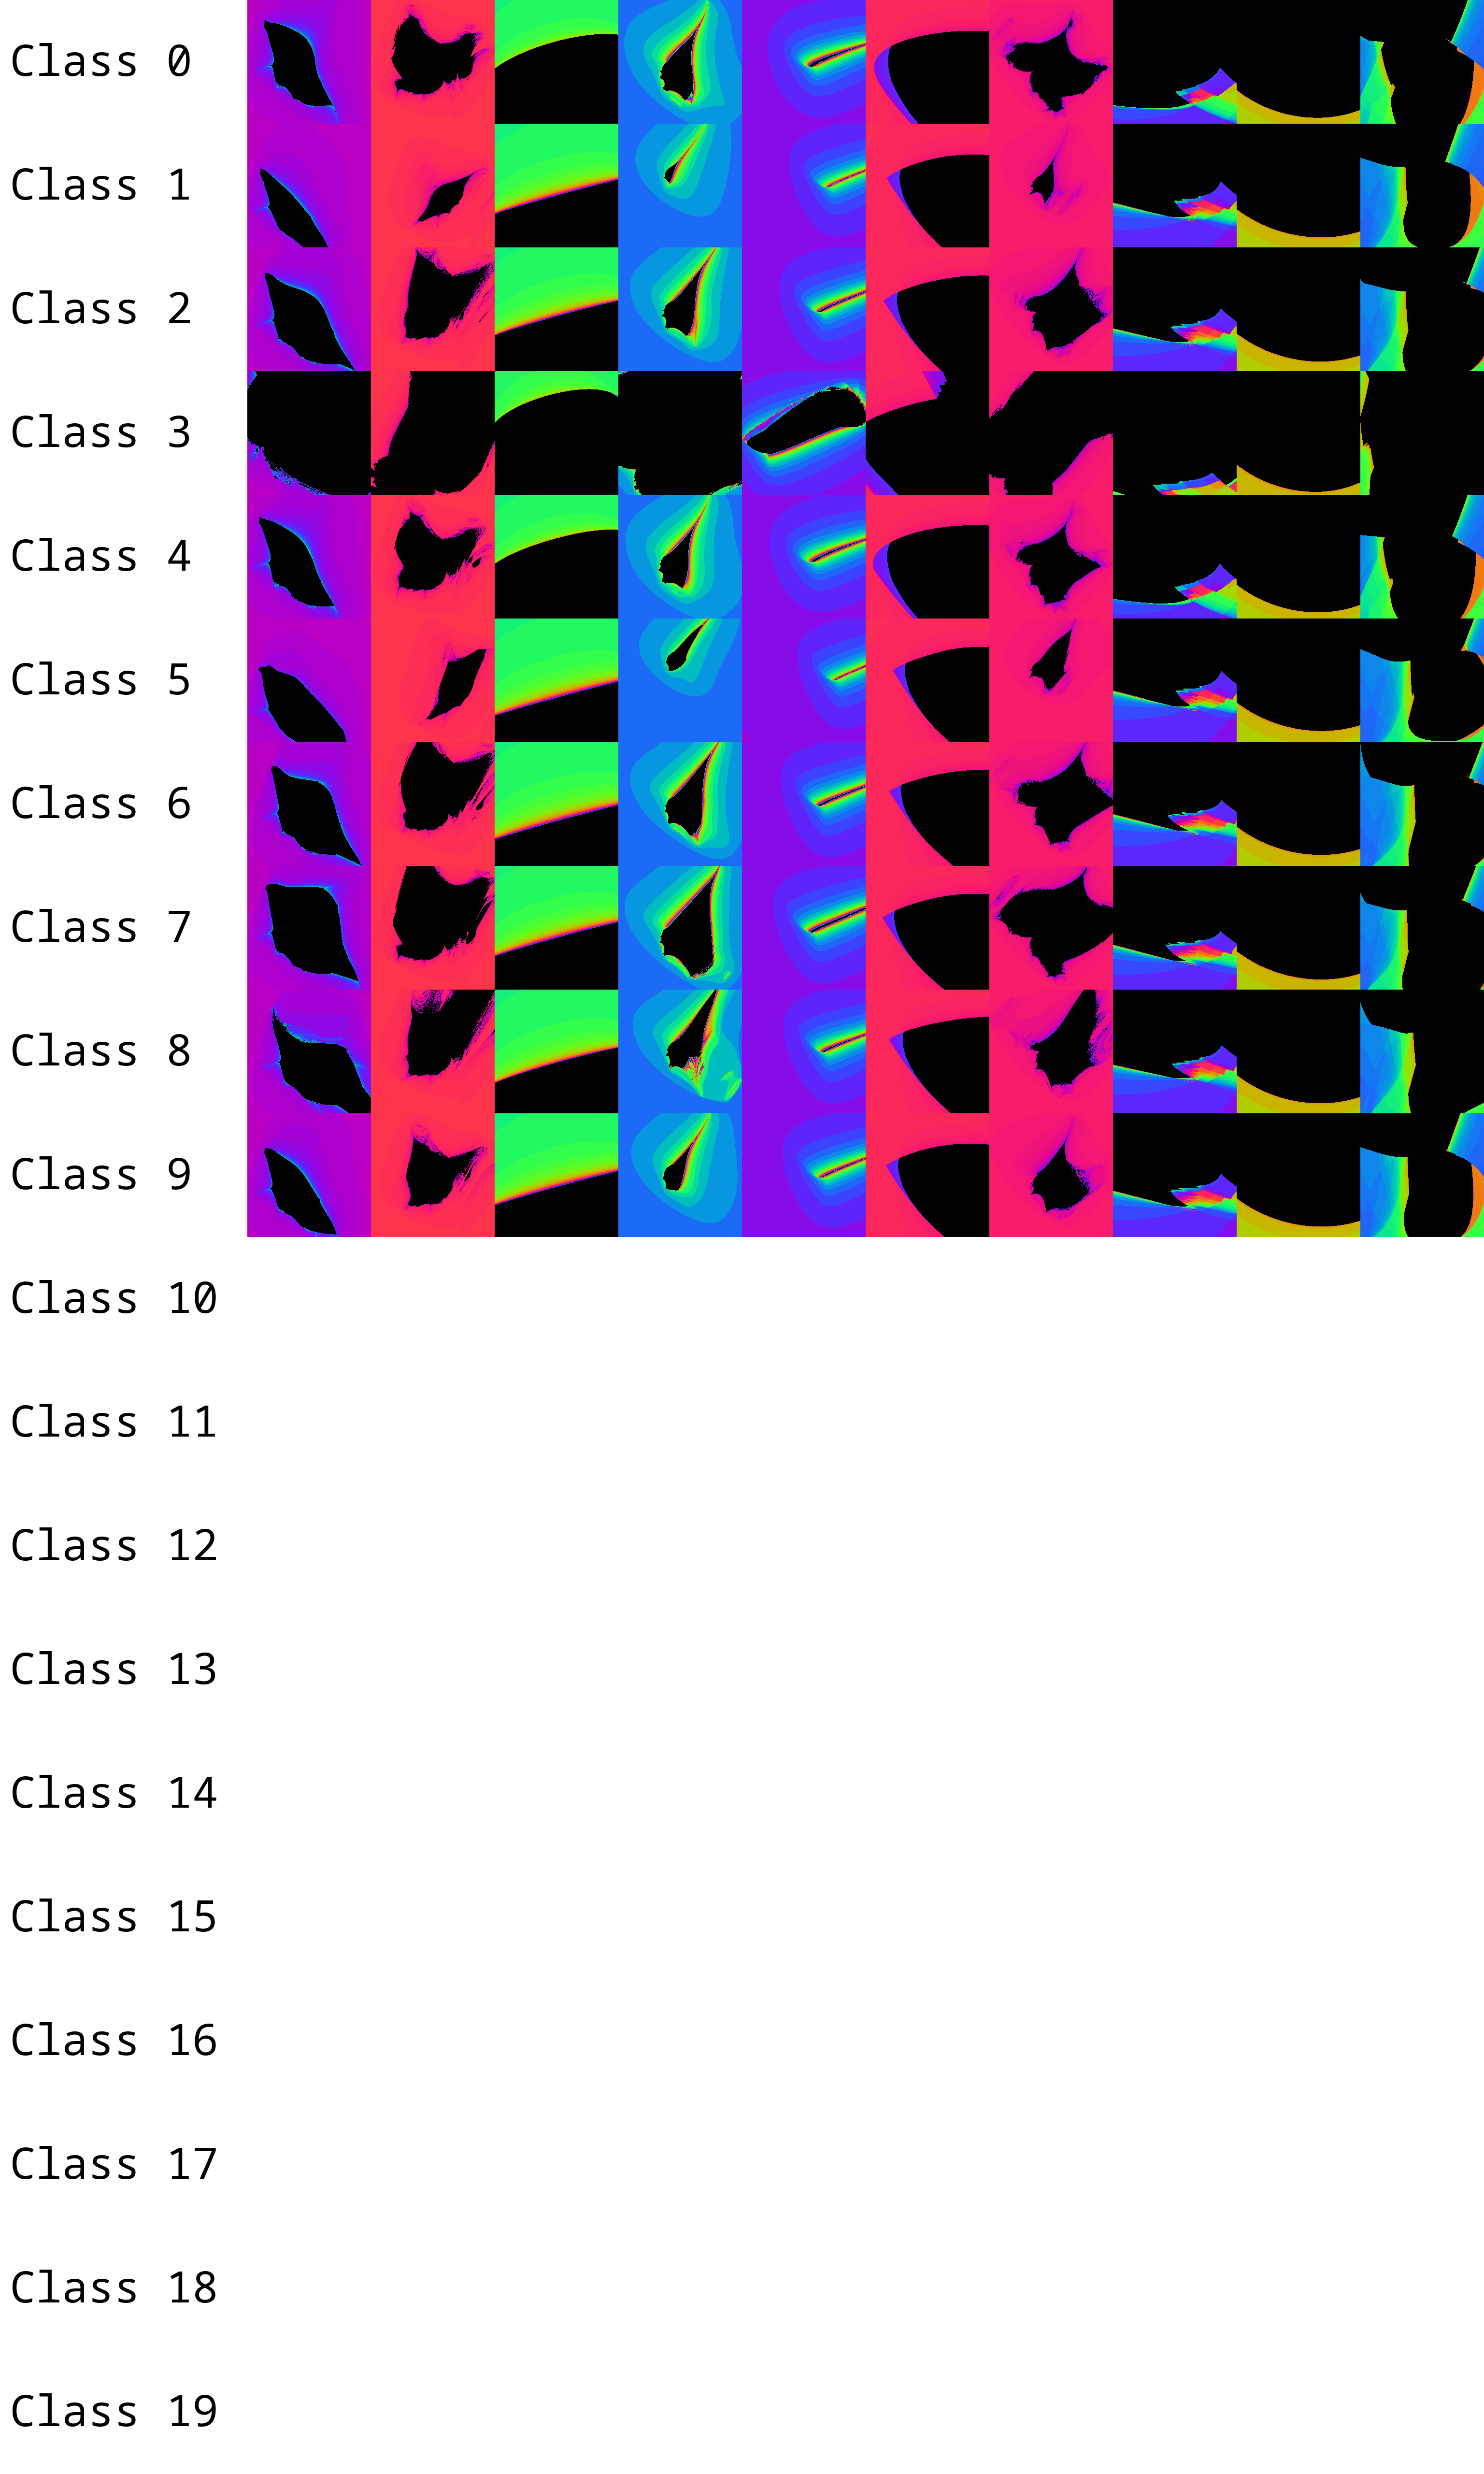

In [4]:
visualize_images(image_dict)

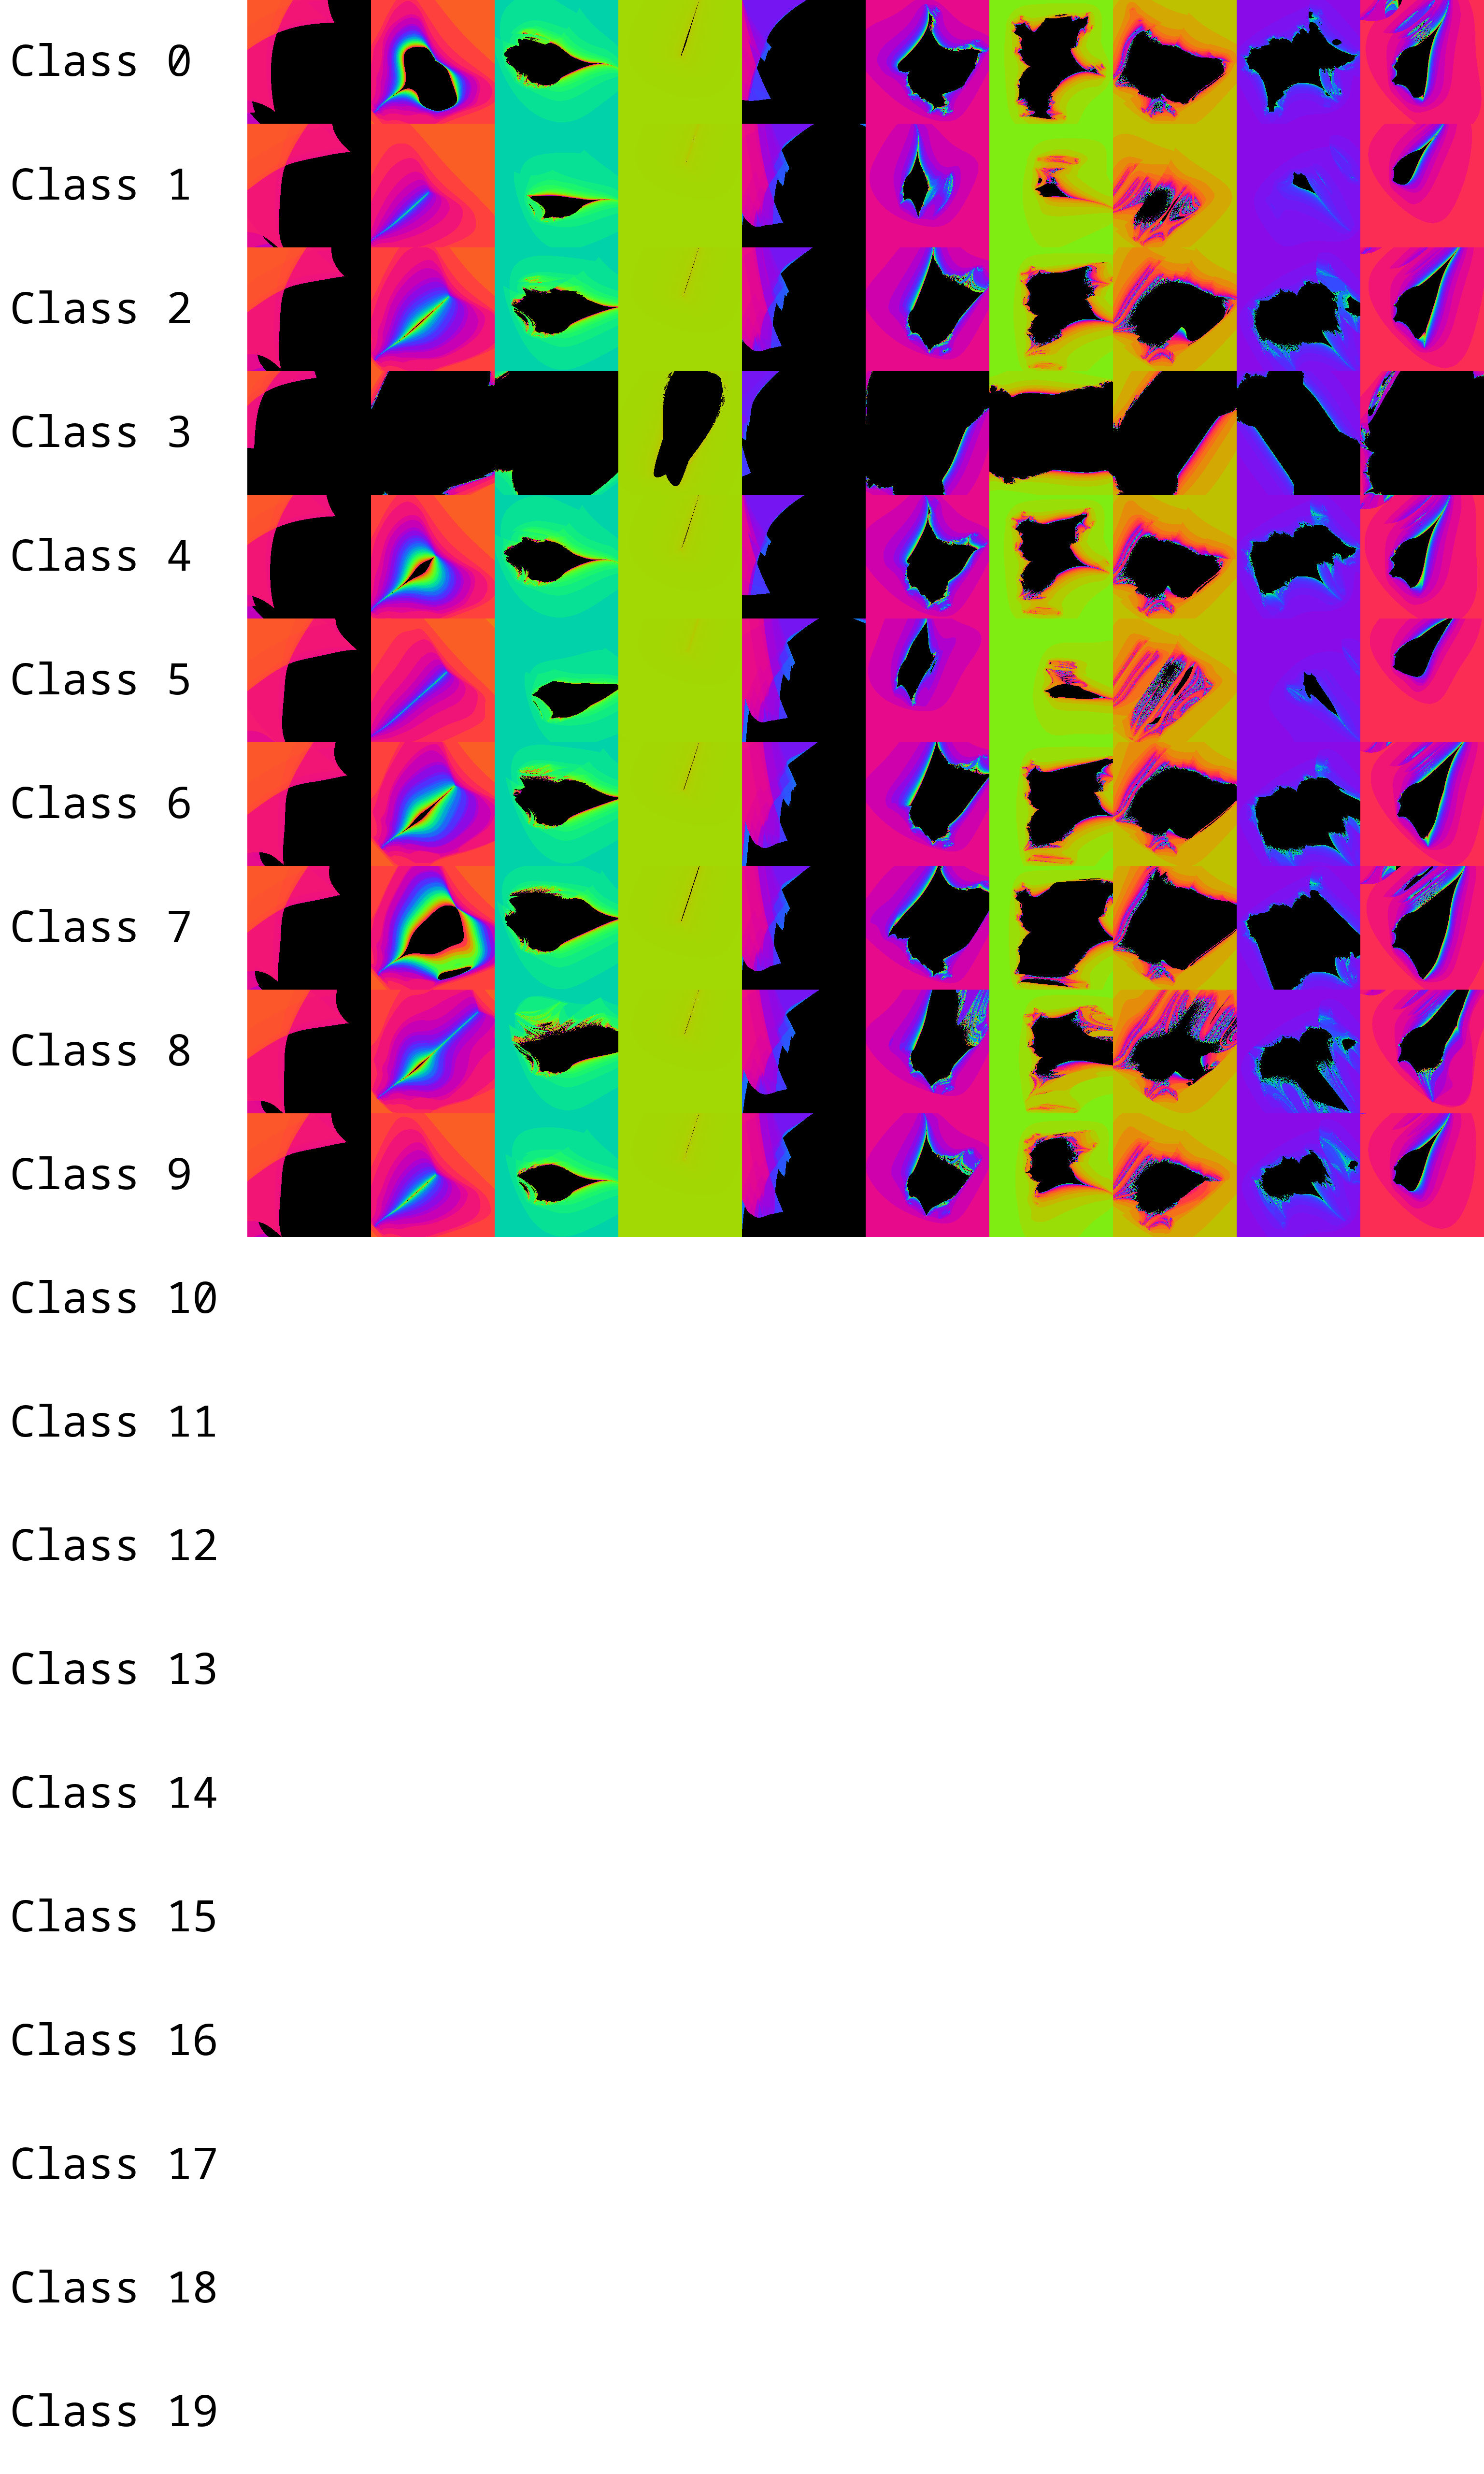

In [3]:




visualize_images(image_dict)